In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt



In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
from camb.dark_energy import DarkEnergyEqnOfState, EarlyQuintessence

In [ ]:
ombh2_val = 0.02237
ombh2_step = 8e-6

omch2_val = 0.120
omch2_step = 3e-5

ten9_As_val = 2.099
As_step = 0.01 / 1e9

ns_val = 0.9649
ns_step = 0.001 

H0_val = 67.3
H0_step = 0.001

tau_val = 0.0544
tau_step = 0.0005

fde_zc_val = 0.122
fde_zc_step = 0.000001

zc_val = 10**(3.562)
zc_step = 1

theta_i_val = 2.83
theta_i_step = 0.0001

print(5)

In [ ]:
#Set up a new set of parameters for CAMB
#Fishermatrix = np.zeroes(81)

#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency


#steps = [ombh2_step, omch2_step, ten9_As_step/ 1e9, ns_step, H0_step, tau_step, fde_zc_step, zc_step, theta_i_step]
Cl_length = 2500
steps = [-theta_i_step, theta_i_step]

Cl_values = np.zeros(shape=(len(steps), Cl_length+49))
for index,value in enumerate(steps):
 
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0_val, ombh2=ombh2_val , omch2=omch2_val, mnu=0, omk=0, tau=tau_val)
    pars.InitPower.set_params(As=(ten9_As_val/1e9), ns=ns_val, r=0)
    pars.DarkEnergy = EarlyQuintessence(n=3, theta_i=theta_i_val+value, fde_zc=fde_zc_val, min_steps_per_osc=1000,
                                                 zc=zc_val , use_zc=True, npoints=2000)
    #pars.set_accuracy(AccuracyBoost=2,  lSampleBoost=50)
    pars.set_for_lmax(Cl_length, lens_potential_accuracy=1);
    results = camb.get_results(pars)
    #get dictionary of CAMB power spectra
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')#, spectra=('lensed_scalar'))
    ClTT=powers['lensed_scalar'][2:,0]
    Cl_values[index] = ClTT

#print(pars)
    
print(Cl_values)

In [ ]:
#Total_750_boosted = Cl_values[0]

def derivative(Clleft, Clright, paramstep):
    der =  (Clright - Clleft) / paramstep
    return der

#derivombh2_750 = derivative(Cl_values[0], Cl_values[1], steps[1])
#derivomch2_750  = derivative(Cl_values[0], Cl_values[1], steps[1])
#derivAs_750 = 1e-9*derivative(Cl_values[0], Cl_values[1], steps[1])
#derivns_750 = derivative(Cl_values[0], Cl_values[1], steps[1])
#derivH0_750 = derivative(Cl_values[0], Cl_values[1], steps[1])
#derivtau_750  = derivative(Cl_values[0], Cl_values[1], steps[1])
#derivfde_zc_750 = derivative(Cl_values[0], Cl_values[1], steps[1])
#derivzc_750 = derivative(Cl_values[0], Cl_values[1], steps[1])
#erivtheta_i_750  = derivative(Cl_values[0], Cl_values[1], steps[1])

print(derivtheta_i_750)

import pandas as pd
#pd.DataFrame(derivtheta_i_750).to_csv("/Users/dijkstra/Data_output/derivtheta_i_750.csv", index=None)
#read1 = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivombh2.csv").to_numpy())[0]
#print(read1)
#Total_750 = Cl_values[2]
#pd.DataFrame(Total_750).to_csv("/Users/dijkstra/Data_output/Total_750.csv", index=None)

In [ ]:

deriv = derivative(Cl_values[0], Cl_values[1], steps[1])
    
F1matrix = 0.5 * ( Cl_Standard**(-2) * (deriv)**2)               
ls1 = np.arange(2,Cl_values[0].shape[0]+2) 
print(deriv)
#print(Fmatrix)
print(np.sum((2*ls1+1)*F1matrix))

In [167]:
Fishermatrix = np.zeros(shape=(9,9))
#Fishermatrix[8,8] = Cl_Standard
#np.array([1,2])
#print(Fishermatrix)
ls = np.arange(2,Thomson_auto.shape[0]+2) 

print(deriv_Thomson_auto[0])
#derivs = np.array([derivombh2_NR, derivomch2_NR, derivAs_NR,derivns_NR, derivH0_NR,derivtau_NR,derivfde_zc_NR,derivzc_NR,derivtheta_i_NR])
#print(derivs[6])
for index, value1 in enumerate(deriv_Thomson_auto):
    for jindex, value2 in enumerate(deriv_Thomson_auto):
        Fmatrix = 0.5 * ( Thomson_auto**(-1) * (value1)*Thomson_auto**(-1)*(value2))
        sum_Fmatrix = np.sum((2*ls+1)*Fmatrix)
        Fishermatrix[index,jindex] = sum_Fmatrix
    #print(value1**(-1))
        
        
print(repr(Fishermatrix))



[-3371.93669581 -2919.49535607 -2501.95426124 ...  3187.63855836
  3175.76106544  3163.70437676]
array([[ 1.63185162e+09, -3.15817202e+08,  2.59508674e+07,
         6.46812113e+07, -8.85745979e+05, -1.06297253e+08,
         4.22011714e+07, -1.50791560e+03, -1.51625959e+06],
       [-3.15817202e+08,  8.61921601e+07, -6.30627289e+06,
        -1.26887034e+07,  2.17267267e+05,  2.59869476e+07,
        -1.18544963e+07,  3.06857234e+02,  3.40801419e+05],
       [ 2.59508674e+07, -6.30627289e+06,  7.63169017e+05,
         1.47462139e+06, -1.51104651e+04, -3.14888089e+06,
         6.30799056e+05, -3.08167207e+01, -4.55491365e+04],
       [ 6.46812113e+07, -1.26887034e+07,  1.47462139e+06,
         3.48787030e+06, -3.45147581e+04, -6.06238445e+06,
         1.34439648e+06, -7.20592553e+01, -9.22207691e+04],
       [-8.85745979e+05,  2.17267267e+05, -1.51104651e+04,
        -3.45147581e+04,  5.81181455e+02,  6.19341440e+04,
        -3.09019436e+04,  8.32486216e-01,  8.19187023e+02],
       [-1.06

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot( [1,0.5, 0.01],[30.0231995  ,30.09543153,29.9505738],label = 'H0=67.3')
ax[0,0].legend()
ax[0,0].set_ylim((25,35))
ax[0,0].set_xlabel('stepsize')
ax[0,1].plot( [0.01,0.005, 0.001, 0.0005 ,0.0001, 0.00001],[-11.36070163,-10.40766736,-7.34374107, -6.94868238,  -6.90763983, -6.88599234],label = 'fde_zc=0.122')
ax[0,1].set_xscale('log')
ax[0,1].legend()
ax[1,0].plot([100,50, 1],[ 0.00416986,0.00420633  ,0.00431966],label = 'zc= 3647')
#ax[1,0].set_xscale('log')
ax[1,0].set_ylim((0,0.01))
ax[1,0].legend()
ax[1,1].plot([1, 0.1,0.02, 0.01, 0.005, 0.001],[-0.15438804, -0.91632183, 23.28918919, 26.61894413,27.40104861,27.64550931  ] ,label = 'theta_i = 2.83')
ax[1,1].set_xscale('log')
ax[1,1].legend()
#fig.set_title('at l = 2')


In [ ]:
y = np.array([[1,2],[3,4]])

print(y[1,0])


print(repr(Fishermatrix))


In [ ]:

a1 = np.array([[1,2],[3,4]])

a2 = np.array([[2,1],[4,4]])
a3 = np.array([a1,a2])

print(a3)
print(np.linalg.inv(a3)[0])
print(np.linalg.inv(a1))


[1023.05259455  968.73101932  916.6991308  ...   76.75429922   76.52000811
   76.28641634]


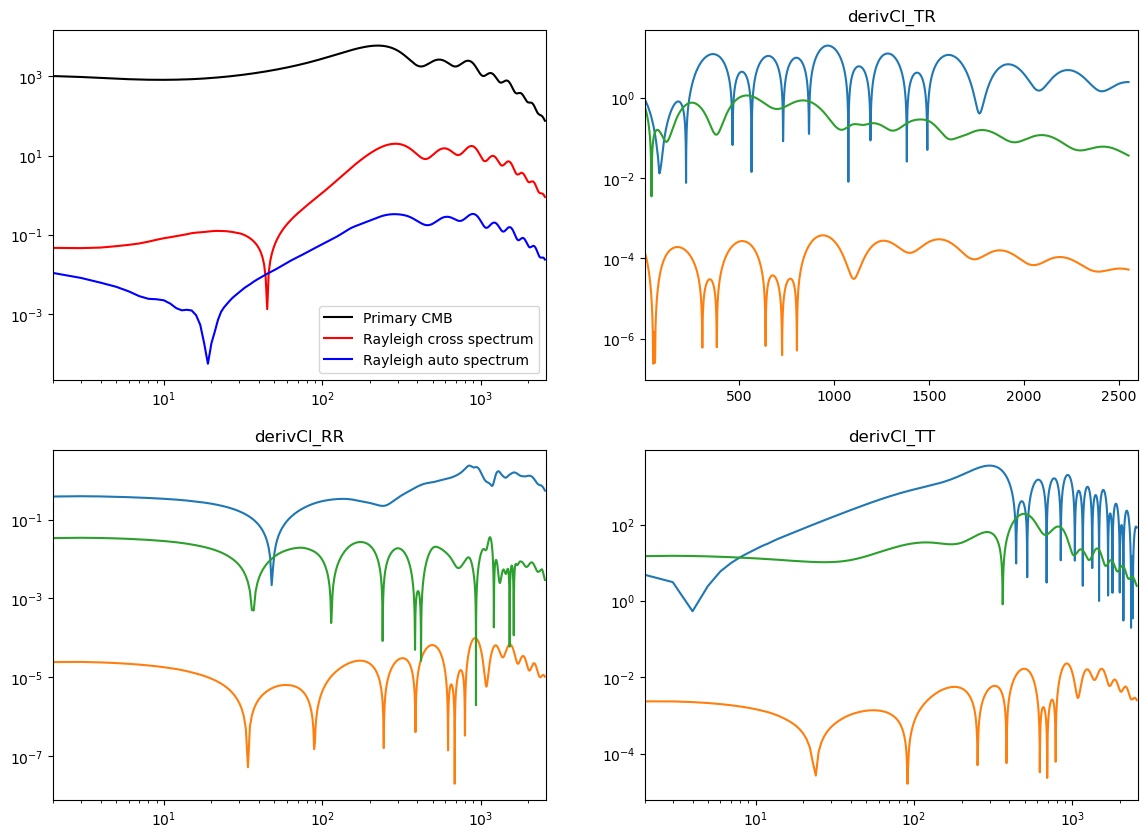

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
#Total_500 = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/Cl_Standard.csv").to_numpy())[0]
#Thomson_auto = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/Cl_Standard_NR.csv").to_numpy())[0]
#Total_250 = Cl_values[2]

print(Thomson_auto)

ls = np.arange(2,Cl_TT.shape[0]+2) 
fig, ax = plt.subplots(2,2, figsize = (14,10))

ax[0,0].plot(ls, Cl_TT, color = 'black' , label = 'Primary CMB')
ax[0,0].plot(ls, abs(Cl_TR), color = 'r' , label = 'Rayleigh cross spectrum')
ax[0,0].plot(ls,  abs(Cl_RR), color = 'blue' , label = 'Rayleigh auto spectrum')
#ax[0,0].tick_params(axis='y', which='minor', bottom=True)
#ax[0,0].set_yticks([1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4])
#ax[0,0].set_xlim([1e1,1e4])

ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[1,0].set_yscale('log')
#print(ls*(ls+1))

#ax[1,1].plot(ls, Total_500, color = 'r' , label = 'Total_500')
#ax[1,1].plot(ls, Thomson_auto, color = 'b' , label = 'Thomson_auto')
#ax[1,1].plot(ls, Total_750, color = 'g' , label = 'Total_750')

#ax[0,1].set_ylim([-15,3])
what=6
#ax[0,1].plot(ls,deriv_Thomson_auto[what] ) 
#ax[0,1].plot(ls, deriv_Total_500[what]) 
#ax[0,1].plot(ls, deriv_Total_750[what]) 
#ax[0,1].plot(ls, 100*(-Thomson_auto + Total_500)/Thomson_auto) 
#ax[0,1].plot(ls, 100*(-Thomson_auto + Total_500)/Thomson_auto) 
for i in range(6,9):
    ax[1,0].plot(ls, abs(derivCl_RR[i]))
    ax[1,1].plot(ls, abs(derivCl_TT[i]))
    ax[0,1].plot(ls, abs(derivCl_TR[i]))

ax[1,0].set_yscale('log')
ax[1,0].set_xscale('log')

#ax[1,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xscale('log')



ax[1,1].set_title('derivCl_TT')
ax[0,1].set_title('derivCl_TR')
ax[1,0].set_title('derivCl_RR')


#ax[0,1].set_xscale('log')
ax[0,0].legend()
for ax in ax.reshape(-1): ax.set_xlim([2,2600]);

In [182]:
import pandas as pd
import numpy as np
Total_500 = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/Cl_Standard.csv").to_numpy())[0]
Thomson_auto = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/Cl_Standard_NR.csv").to_numpy())[0]
#Total_250 = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/Total_250_boosted.csv").to_numpy())[0]
Total_750 = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/Total_750.csv").to_numpy())[0]

freq_scale = 500
Cl_TT = Thomson_auto
#Cl_TR = -(1/30) * (Total_500 - Thomson_auto - 256*(Total_250 - Thomson_auto))
Cl_TR = ((freq_scale/500)**4)*(81/130) * (Total_500 - Thomson_auto - (256/6561)*(Total_750 - Thomson_auto))
Cl_RR = ((freq_scale/500)**8)* (-16/65) * (Total_500 - Thomson_auto - (16/81)*(Total_750 - Thomson_auto))


#(Total_500 - Cl_TT - 2*Cl_TR)

#Cl_RR = (16/15) * (Total_500 - Thomson_auto - 16*(Total_250 - Thomson_auto))

derivombh2_NR = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivombh2_NR.csv").to_numpy())[0]
derivomch2_NR= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivomch2_NR.csv").to_numpy())[0]
derivAs_NR= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivAs_NR.csv").to_numpy())[0]
derivns_NR= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivns_NR.csv").to_numpy())[0]
derivH0_NR= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivH0_NR.csv").to_numpy())[0]
derivtau_NR= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivtau_NR.csv").to_numpy())[0]
derivfde_zc_NR= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivfde_zc_NR.csv").to_numpy())[0]
derivzc_NR= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivzc_NR.csv").to_numpy())[0]
derivtheta_i_NR= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivtheta_i_NR.csv").to_numpy())[0]

deriv_Thomson_auto =0.5*np.array([derivombh2_NR, derivomch2_NR, derivAs_NR,derivns_NR, derivH0_NR,derivtau_NR,derivfde_zc_NR,derivzc_NR,derivtheta_i_NR])

derivombh2 = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivombh2.csv").to_numpy())[0]
derivomch2= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivomch2.csv").to_numpy())[0]
derivAs= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivAs.csv").to_numpy())[0]
derivns= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivns.csv").to_numpy())[0]
derivH0= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivH0.csv").to_numpy())[0]
derivtau= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivtau.csv").to_numpy())[0]
derivfde_zc= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivfde_zc.csv").to_numpy())[0]
derivzc= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivzc.csv").to_numpy())[0]
derivtheta_i= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivtheta_i.csv").to_numpy())[0]

deriv_Total_500 =0.5*np.array([derivombh2, derivomch2, derivAs,derivns, derivH0,derivtau,derivfde_zc,derivzc,derivtheta_i])

#derivombh2_250 = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivombh2_250.csv").to_numpy())[0]
#derivomch2_250= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivomch2_250.csv").to_numpy())[0]
#derivAs_250= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivAs_250.csv").to_numpy())[0]
#derivns_250= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivns_250.csv").to_numpy())[0]
#derivH0_250= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivH0_250.csv").to_numpy())[0]
#derivtau_250= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivtau_250.csv").to_numpy())[0]
#derivfde_zc_250= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivfde_zc_250.csv").to_numpy())[0]
#derivzc_250= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivzc_250.csv").to_numpy())[0]
#derivtheta_i_250= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivtheta_i_250.csv").to_numpy())[0]


#deriv_Total_250 = np.array([derivombh2_250, derivomch2_250, derivAs_250,derivns_250, derivH0_250,derivtau_250,derivfde_zc_250,derivzc_250,derivtheta_i_250])


derivombh2_750 = np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivombh2_750.csv").to_numpy())[0]
derivomch2_750= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivomch2_750.csv").to_numpy())[0]
derivAs_750= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivAs_750.csv").to_numpy())[0]
derivns_750= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivns_750.csv").to_numpy())[0]
derivH0_750= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivH0_750.csv").to_numpy())[0]
derivtau_750= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivtau_750.csv").to_numpy())[0]
derivfde_zc_750= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivfde_zc_750.csv").to_numpy())[0]
derivzc_750= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivzc_750.csv").to_numpy())[0]
derivtheta_i_750= np.transpose(pd.read_csv("/Users/dijkstra/Data_output/derivtheta_i_750.csv").to_numpy())[0]

deriv_Total_750 = 0.5*np.array([derivombh2_750, derivomch2_750, derivAs_750,derivns_750, derivH0_750,derivtau_750,derivfde_zc_750,derivzc_750,derivtheta_i_750])

derivCl_TT =  deriv_Thomson_auto
derivCl_TR = ((freq_scale/500)**4)*(81/130) * (deriv_Total_500 - deriv_Thomson_auto - (256/6561)*(deriv_Total_750 - deriv_Thomson_auto))
derivCl_RR = ((freq_scale/500)**8)* (-16/65) * (deriv_Total_500 - deriv_Thomson_auto - (16/81)*(deriv_Total_750 - deriv_Thomson_auto))

#derivCl_TR = -(1/30) * (deriv_Total_500 - deriv_Thomson_auto - 256*(deriv_Total_250 - deriv_Thomson_auto))
#derivCl_RR = (16/15) * (deriv_Total_500 - deriv_Thomson_auto - 16*(deriv_Total_250 - deriv_Thomson_auto))

print(deriv_Total_500)

#print(Thomson_auto.shape[0])
#what =0
#print((16/15) * (Total_500[what] - Thomson_auto[what] - 16*(Total_250[what] - Thomson_auto[what])))
#print(len(ls))
#print(deriv_Total_250)


[[-3.35983998e+03 -2.91190500e+03 -2.48986848e+03 ...  3.03729728e+03
   3.02573799e+03  3.01400833e+03]
 [-3.63769990e+03 -2.75305446e+03 -2.13333333e+03 ... -5.53587234e+02
  -5.50859870e+02 -5.48046016e+02]
 [ 4.87441361e+02  4.61563863e+02  4.36779417e+02 ...  3.77545363e+01
   3.76665726e+01  3.75788370e+01]
 ...
 [-3.45381991e+00 -1.71863135e+00  8.32738707e-01 ...  8.04688771e+01
   8.00973988e+01  7.97077607e+01]
 [ 2.10316536e-03  2.09541736e-03  2.00648017e-03 ... -2.46172304e-03
  -2.45335723e-03 -2.44492171e-03]
 [ 1.38227547e+01  1.41144692e+01  1.39582727e+01 ... -2.43345692e+00
  -2.42537743e+00 -2.41748408e+00]]


In [172]:
covariance_matrix = np.zeros(shape=(2,2, len(Total_500)))


covariance_matrix[0,0] = Cl_TT
covariance_matrix[1,1] = (Cl_TT + 2*Cl_TR + Cl_RR) # Cl_RR
covariance_matrix[1,0]=  (Cl_TT + Cl_TR) #Cl_TR
covariance_matrix[0,1] = (Cl_TT + Cl_TR) #Cl_TR
#print(covariance_matrix[:,:,1])
#print(inv_cov[:,:,:])


inv_cov = np.linalg.inv(covariance_matrix.T).T

#print(inv_cov[:,:,0])

#rint(np.linalg.inv(np.array([[1023.05259455, 1023.05555022],[1023.05555022, 1023.05880923]])))


deriv_cov = np.zeros(shape=(2,2,9, len(Total_500))) 
deriv_cov[0,0] = derivCl_TT
deriv_cov[1,1] = (derivCl_TT + 2*derivCl_TR + derivCl_RR)
deriv_cov[1,0] = (derivCl_TT + derivCl_TR)
deriv_cov[0,1] = (derivCl_TT + derivCl_TR)


#print(deriv_cov[:,:,0,:])

In [173]:
Fishermatrix = np.zeros(shape=(9,9))
ls = np.arange(2,Total_500.shape[0]+2) 

derivs = np.arange(0,9)
#derivs = np.array([derivombh2_NR, derivomch2_NR, derivAs_NR,derivns_NR, derivH0_NR,derivtau_NR,derivfde_zc_NR,derivzc_NR,derivtheta_i_NR])
for index, value1 in enumerate(derivs):
    for jindex, value2 in enumerate(derivs):
        
        Fmatrix = 0.5 * np.trace(np.einsum('ijb, jkb -> ikb',np.einsum('ijb, jkb -> ikb',inv_cov, deriv_cov[:,:,index,:]), np.einsum('ijb, jkb -> ikb',inv_cov, deriv_cov[:,:,jindex,:]))) 
        sum_Fmatrix = np.sum((2*ls+1)*Fmatrix)
        Fishermatrix[index,jindex] = sum_Fmatrix

#print(Fishermatrix)
#print(ls)
print(repr(Fishermatrix))


array([[ 6.48225928e+10,  4.37532602e+08,  2.05279445e+08,
         1.51711787e+09,  3.38824958e+07, -1.22854959e+09,
         8.15066140e+09, -1.07975807e+05,  1.40466574e+08],
       [ 4.37532602e+08,  2.18370909e+09, -1.61342061e+07,
         5.34093316e+08,  1.55321490e+07, -1.31288363e+08,
        -1.82221911e+09,  6.11575424e+04,  9.93825640e+07],
       [ 2.05279445e+08, -1.61342061e+07,  1.51781698e+06,
         2.95713960e+06,  5.77791614e+03, -6.19237024e+06,
         4.17608224e+07, -8.13937855e+02, -2.05630214e+05],
       [ 1.51711787e+09,  5.34093316e+08,  2.95713960e+06,
         1.77455493e+08,  4.67571298e+06, -7.15591093e+07,
        -3.07055676e+08,  1.35790669e+04,  2.89570980e+07],
       [ 3.38824958e+07,  1.55321490e+07,  5.77791614e+03,
         4.67571298e+06,  1.29710363e+05, -1.65558006e+06,
        -9.92781064e+06,  4.01673323e+02,  8.04318974e+05],
       [-1.22854959e+09, -1.31288363e+08, -6.19237024e+06,
        -7.15591093e+07, -1.65558006e+06,  4.957880

In [79]:
A = np.array([[[4, 2, 3],
        [2, 3, 1]],

       [[3, 3, 4],
        [4, 4, 4]]])


B = np.array([[[1, 1,1],
        [2, 3, 1]],

       [[3, 3, 4],
        [4, 4, 4]]])


print(np.matmul(A_inv[:,:,2], B[:,:,2]))
#print(np.linalg.inv(np.array([[4,2],[3,4]])))
A_inv = np.linalg.inv(A.T).T
print(A_inv)
print(np.einsum('ijb, jkb -> ikb', A_inv,B))
print(np.sum(np.trace(np.einsum('ijb, jkb -> ikb', np.einsum('ijb, jkb -> ikb' , A_inv,B), np.einsum('ijb, jkb -> ikb' , A_inv,B)))*(np.array([1,1,1])*2 +1)))
#print(np.tensordot(A, B, axes=[0, 1]))
matrix = np.zeros(shape=(2,2,3))
for i in range(np.shape(matrix)[2]):
    matrix[:,:,i] = np.matmul(A[:,:,i],B[:,:,i]) 
#print(matrix)
#print( np.matmul(A,B, out=(2,2,3))) #figure this out

#print(np.trace(np.einsum('ijb, jkb -> ikb' , A,B)))

y = np.array([[1,2], [3,4]])
#print(y)

[[5.55111512e-17 5.55111512e-17]
 [1.00000000e+00 1.00000000e+00]]
[[[ 0.4   -4.     0.5  ]
  [-0.2    3.    -0.125]]

 [[-0.3    3.    -0.5  ]
  [ 0.4   -2.     0.375]]]
[[[-2.00000000e-01  5.00000000e+00  5.55111512e-17]
  [ 0.00000000e+00  0.00000000e+00  5.55111512e-17]]

 [[ 9.00000000e-01 -3.00000000e+00  1.00000000e+00]
  [ 1.00000000e+00  1.00000000e+00  1.00000000e+00]]]
84.11999999999995
